In [ ]:
!pip install gensim

In [ ]:
# DataFrame Altos y Bajos
df_alto = df[(df['SCORE'] == 9) | (df['SCORE'] == 10)]
df_bajo = df[df['SCORE'] < 9]

#Indices
indices_altos = df[(df['SCORE'] == 9) | (df['SCORE'] == 10)].index
corpus_altos = [corpus1[i] for i in indices_altos]

indices_bajos = df[df['SCORE'] < 9].index
corpus_bajos = [corpus1[i] for i in indices_bajos]

In [ ]:
print(df_alto.shape)
print(df_bajo.shape)

(46940, 6)
(8584, 6)


In [ ]:
# Tokenizar corpus
tokens = list(map(lambda doc: doc.split(), corpus1))

In [ ]:
# Tokenizar corpus por valoraciones altas y bajas
tokens_alto = list(map(lambda doc: doc.split(), corpus_altos))
tokens_bajo = list(map(lambda doc: doc.split(), corpus_bajos))

In [ ]:
from gensim.models.fasttext import FastText

In [ ]:
model = FastText(
        sentences = tokens,
        vector_size = 100,
        epochs = 20,
        workers = -1, # específica que se debe usar el número máximo de procesos.
        min_n = 2,
        max_n = 4
        )
display(model)

In [ ]:
model_alto = FastText(
        sentences = tokens_alto,
        vector_size = 100,
        epochs = 20,
        workers = -1, # específica que se debe usar el número máximo de procesos.
        min_n = 2,
        max_n = 4
        )
display(model_alto)

In [ ]:
model_bajo = FastText(
        sentences = tokens_bajo,
        vector_size = 100,
        epochs = 20,
        workers = -1, # específica que se debe usar el número máximo de procesos.
        min_n = 2,
        max_n = 4
        )
display(model_bajo)

In [ ]:
vect = model.wv["DDV"]
display(vect)

array([-3.6651036e-05, -3.4862454e-04, -1.8444554e-03, -7.7017583e-04,
        9.3977689e-04, -6.6775799e-04, -3.0828426e-03,  1.8192950e-03,
        1.8390382e-03, -1.6943443e-03,  3.4150698e-03,  2.8918730e-03,
       -3.3670518e-04,  2.8591382e-03,  7.3293639e-05, -2.4658749e-03,
       -3.5365128e-03,  1.0129064e-03,  2.8562162e-03, -6.2795612e-04,
       -5.8296109e-03,  4.7276830e-03, -2.8149318e-03, -2.1416128e-03,
        1.6370186e-03,  1.0349738e-03, -6.9743639e-04,  1.1183572e-03,
       -8.6871203e-04, -1.4298476e-03, -1.8378136e-03, -1.3451142e-03,
       -1.7480676e-04,  2.0489041e-03, -3.8196349e-03,  7.9435075e-04,
        3.4239276e-03, -1.7500249e-03, -5.3772354e-04, -7.9764570e-05,
       -9.9621958e-04,  1.2095271e-03, -1.6068347e-04,  4.0908707e-03,
        3.3005127e-03,  1.8811108e-04, -2.2660259e-03,  2.3916450e-03,
        5.8251189e-04, -3.7185571e-04, -3.0185742e-04, -2.8544541e-03,
       -2.5812783e-03, -3.9283166e-04, -1.3556087e-03, -1.1261448e-03,
      

In [ ]:
# Wordcloud para corpus completo (corpus1)
!pip install wordcloud
import wordcloud # Make sure the wordcloud module is imported
from wordcloud import WordCloud # Import the WordCloud class from the wordcloud module

word_freq = {}
for word in model.wv.key_to_index: # Access the vocabulary using wv.key_to_index
    word_freq[word] = model.wv.get_vecattr(word, "count") # Get word frequency using get_vecattr


wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)

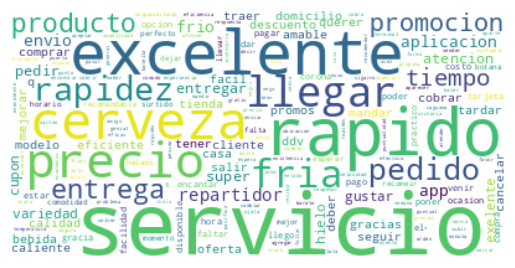

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Wordcloud para scores altos
word_freq = {}
for word in model_alto.wv.key_to_index: # Access the vocabulary using wv.key_to_index
    word_freq[word] = model_alto.wv.get_vecattr(word, "count") # Get word frequency using get_vecattr


wordcloud_alto = WordCloud(background_color="white").generate_from_frequencies(word_freq)

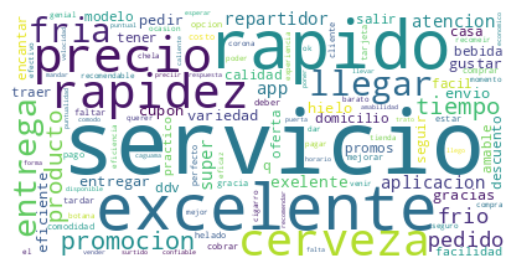

In [ ]:
plt.imshow(wordcloud_alto, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Wordcloud para scores bajos
word_freq = {}
for word in model_bajo.wv.key_to_index: # Access the vocabulary using wv.key_to_index
    word_freq[word] = model_bajo.wv.get_vecattr(word, "count") # Get word frequency using get_vecattr


wordcloud_bajo = WordCloud(background_color="white").generate_from_frequencies(word_freq)

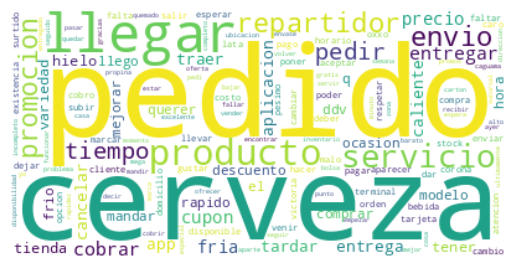

In [ ]:
plt.imshow(wordcloud_bajo, interpolation='bilinear')
plt.axis("off")
plt.show()